<a href="https://colab.research.google.com/github/brunolongo92/JAVArep/blob/master/ComparadorAirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

Comisión 1

Integrantes: 

- Longo, Bruno

- Rodriguez, Abril Nazarena

# Problema

El objetivo del presente trabajo es dar respuesta a las dos preguntas que nos hemos formulado. Ellas son:

- ¿CUÁLES SON LOS PRECIOS DE LOS DISTINTOS TIPOS DE ALOJAMIENTO SEGÚN BARRIO?
- ¿CUÁLES SON LOS BARRIOS MÁS POPULARES ENTRE LOS TURISTAS? (teniendo en cuenta cantidad de reviews) 

Para responder a las mismas, accederemos a la información brindada por airbnb acerca de la ciudad de Bangkok (Tailandia) mediante su lectura y procesamiento, utilizando distintas estructuras de datos que nos facilitarán su manejo. 

Para finalizar, plasmaremos los resultados obtenidos en los gráficos que consideremos adecuados con el fin de facilitar su visualización y comprensión.



# Estructuras de datos

A lo largo del desarrollo del trabajo utilizaremos listas, diccionarios y algunas de sus combinaciones para poder cargar los datos y trabajar sobre ellos, con el fin de responder las preguntas planteadas anteriormente.

# Carga de datos

En esta sección haremos la lectura y carga de datos. Importaremos el módulo csv y a través de reader podremos leer el mismo, previamente cargado. Antes de eso, crearemos listas y diccionarios vacíos donde almacenaremos la información que vamos a necesitar más adelante, como son los barrios, los precios, las reviews, etc. 

Como datos generales, sabemos que hay 50 barrios con 16616 opciones de alojamiento, divididos en 4 categorias (Casa/depto entero, H.Hotel, H.Priv y H.Compartida). 

In [30]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
  
precio_por_barrio = {}
barrios = []
precios = []
tipo_aloj = []
reviews = []
barrio_y_su_prom_de_precios = {}
barrio_precios_Hogar = {} #dicc con barrio : lista de precios de hogar
barrio_precios_Hotel = {} #dicc con barrio : lista de precios de hotel
barrio_precios_HabPriv = {} #dicc con barrio : lista de precios de hab privada
barrio_precios_HabComp = {} #dicc con barrio : lista de precios de hab compartida

def lector_csv(file):
  with open(file) as File:
    reader = csv.reader(File, delimiter=',')
    headings = next(reader)
    num_row = 0
    for row in reader:
      barrios.append(row[5].title()) # row 5 es nombre de barrio
      tipo_aloj.append(row[8]) # row 8 es tipo de aloj
      precios.append(row[9]) # row 9 es precio
      reviews.append(row[11]) # row 11 son las reviews
      num_row += 1
      if(num_row == 16617): #cantidad de rows que procesamos
        break;

lector_csv("listingsBangkok.csv")

# Funciones generales

In [31]:
def promedio(lista):
    '''Se le pasa una lista, devuelve el valor promedio 
    de la lista'''    
    return round(sum(lista)/len(lista),1)

def promedio_dicc(dicc):
    '''Se le pasa un diccionario, devuelve el valor promedio 
    de la lista formada con sus valores'''    
    lista = []
    for x,y in dicc.items():
      lista.append(promedio(y))
    return round(sum(lista)/len(lista),1)

# Primera Pregunta

LISTA DE BARRIO Y EL PROMEDIO DE SUS PRECIOS, ESCRIBA LOS NOMBRES DE LOS QUE DESEE COMPARAR
Lat Krabang 3750.3
Thawi Watthana 1783.3
Bang Na 1598.9
Bang Sue 1542.7
Lak Si 1171.4
Taling Chan 6645.6
Don Mueang 1212.8
Thung Khru 1621.0
Bang Khun Thain 3244.6
Yan Na Wa 4604.0
Nong Chok 3186.4
Pra Wet 2034.5
Ratchathewi 1763.2
Bang Kapi 1386.7
Din Daeng 2477.0
Rat Burana 2330.2
Bang Rak 2457.3
Saphan Sung 2309.9
Sathon 3313.7
Min Buri 1337.7
Bang Phlat 1290.6
Phaya Thai 1690.4
Chatu Chak 1789.1
Khlong San 2536.1
Khlong Toei 2545.6
Sai Mai 1614.8
Vadhana 3427.4
Bangkok Yai 1863.7
Huai Khwang 2043.6
Phasi Charoen 1344.9
Phra Khanong 1803.5
Parthum Wan 3320.9
Bang Kho Laen 1837.5
Phra Nakhon 1560.8
Bang Khen 1290.2
Dusit 2720.4
Samphanthawong 2254.9
Suanluang 1591.2
Bueng Kum 2267.3
Wang Thong Lang 1474.0
Khan Na Yao 2004.7
Chom Thong 2182.9
Lat Phrao 2564.0
Thon Buri 2586.6
Khlong Sam Wa 2216.9
Bang Khae 4162.0
Bangkok Noi 2052.7
Pom Prap Sattru Phai 1783.3
Nong Khaem 1696.8
Bang Bon 1485.5
L

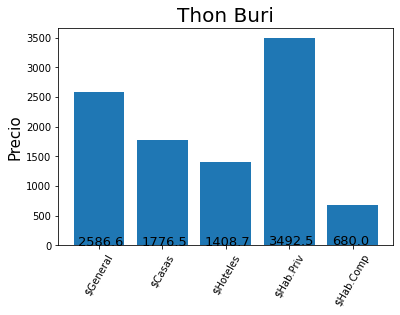

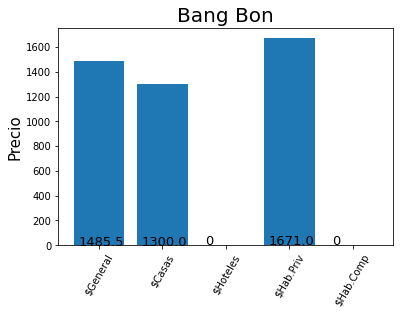

In [32]:
for i in range (len(barrios)): # creamos el diccionario que contiene str(barrio):lista(int(precios)) 
  if barrios[i] in precio_por_barrio.keys():
    precio_por_barrio[barrios[i]].append(int(precios[i]))
  else:
    precio_por_barrio[barrios[i].title()]=[int(precios[i])]

for i in range (len(barrios)): # creamos 4 diccionarios y cada uno contiene barrio : lista de precios según alojamiento
  if tipo_aloj[i] == "Entire home/apt" and barrios[i] in barrio_precios_Hogar.keys():
    barrio_precios_Hogar[barrios[i]].append(int(precios[i]))
  elif tipo_aloj[i] == "Entire home/apt" and barrios[i] not in barrio_precios_Hogar.keys():
    barrio_precios_Hogar[barrios[i]]=[int(precios[i])]
  elif tipo_aloj[i] == "Private room" and barrios[i] in barrio_precios_HabPriv.keys():
    barrio_precios_HabPriv[barrios[i]].append(int(precios[i]))
  elif tipo_aloj[i] == "Private room" and barrios[i] not in barrio_precios_HabPriv.keys():  
    barrio_precios_HabPriv[barrios[i]]=[int(precios[i])]
  elif tipo_aloj[i] == "Hotel room" and barrios[i] in barrio_precios_Hotel.keys():
    barrio_precios_Hotel[barrios[i]].append(int(precios[i]))
  elif tipo_aloj[i] == "Hotel room" and barrios[i] not in barrio_precios_Hotel.keys():
    barrio_precios_Hotel[barrios[i]]=[int(precios[i])]
  elif tipo_aloj[i] == "Shared room" and barrios[i] in barrio_precios_HabComp.keys():
    barrio_precios_HabComp[barrios[i]].append(int(precios[i]))
  elif tipo_aloj[i] == "Shared room" and barrios[i] not in barrio_precios_HabComp.keys():
    barrio_precios_HabComp[barrios[i]]=[int(precios[i])]

print("LISTA DE BARRIO Y EL PROMEDIO DE SUS PRECIOS, ESCRIBA LOS NOMBRES DE LOS QUE DESEE COMPARAR")
for x,y in precio_por_barrio.items(): #crea dicc con barrio : promedio de precios
  barrio_y_su_prom_de_precios[x] = promedio(y)
  print (x,promedio(y))
print("LISTA DE BARRIO Y EL PROMEDIO DE SUS PRECIOS, ESCRIBA LOS NOMBRES DE LOS QUE DESEE COMPARAR")

def buscador(barrio):
    '''ingresa nombre barrio y devuelve una lista con los valores de alquiler de la sig forma:
    barrio -> [$promedio, $promedio_casa, $promedio_hotel, $promedio_priv, $promedio_comp]'''   
    lista = []
    etiquetas = ["$General","$Casas","$Hoteles","$Hab.Priv","$Hab.Comp"]
    lista.append(promedio(precio_por_barrio[barrio]))
    lista.append(promedio(barrio_precios_Hogar[barrio]))
    if barrio not in barrio_precios_Hotel.keys():
      lista.append(0)
    else:
      lista.append(promedio(barrio_precios_Hotel[barrio]))
    lista.append(promedio(barrio_precios_HabPriv[barrio]))
    if barrio not in barrio_precios_HabComp.keys():
      lista.append(0)
    else:
      lista.append(promedio(barrio_precios_HabComp[barrio]))
    fig, ax = plt.subplots()
    for i, v in enumerate(lista):
      ax.text(i - .33, i, str(v), color='black', fontsize=13)
    plot = (plt.bar(etiquetas, lista) , plt.xticks(rotation = 60), plt.title(barrio,fontsize=20),plt.ylabel('Precio',fontsize=15))
    return plt.show()

def comparador(barrio1, barrio2):
  buscador(barrio1.title())
  buscador(barrio2.title())
  return

comparador(input("Ingrese primer barrio "), input("Ingrese segundo barrio "))

# Segunda pregunta

In [33]:
#2° PREGUNTA: BARRIO MÁS POPULAR ENTRE LOS TURISTAS (BASÁNDONOS EN CANTIDAD DE REVIEWS)

reviews_por_barrio = {}
total_reviews_por_barrio = {}
listatotalreviews = []

''' Se recorre cada fila "barrio". Si el nombre del barrio ya existe como clave, se agrega la review a la lista que se encuentra como valor.
De lo contrario, se agrega como clave el nombre 
del barrio y como valor, una lista con las reviews. '''

#diccionario = {"nombre barrio" = lista de reviews}

for i in range (len(barrios)):
  if barrios[i] in reviews_por_barrio.keys():
    reviews_por_barrio[barrios[i]].append(int(reviews[i]))
  else:
    reviews_por_barrio[barrios[i]]=[int(reviews[i])]


''' Se recorre el anterior diccionario, y se crea uno nuevo, en donde las claves son las mismas (los distintos barrios),
pero los valores son enteros que corresponden a la suma de todas las reviews que había en cada lista. '''

for clave,valor in reviews_por_barrio.items():
  total_reviews_por_barrio[clave] = sum(valor)      

# pprint.pprint(total_reviews_por_barrio)

''' Se recorren todos los valores (los cuales son enteros), y se agregan a una lista '''
def MaximoValor(diccionario):
  '''Esta función recibe como parámetro un diccionario, y agrega sus valores a una lista'''
  listaconclaves = []
  for valor in total_reviews_por_barrio.values():
    listaconclaves.append(valor)
  return listaconclaves


max(listatotalreviews)


ValueError: ignored

In [ ]:
import matplotlib as plt
import seaborn as sns
sns.set()

plt.figure(figsize = (15,8))
plt.bar()

# Sección nueva

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize = (15,10))
plt.pie(total_reviews_por_barrio.values(), labels = total_reviews_por_barrio.keys())